In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("Credit Score Classification Dataset.csv")

# Exploratory Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


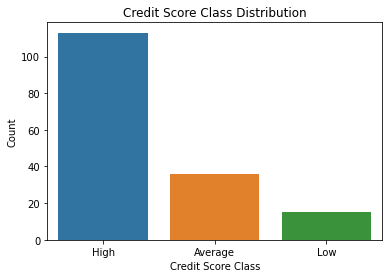

In [4]:
# Plotting the count of each credit score class
sns.countplot(x='Credit Score', data=data)
plt.title('Credit Score Class Distribution')
plt.xlabel('Credit Score Class')
plt.ylabel('Count')
plt.show()

#### this data shows that this is an imbalance problem. we need to be careful!

In [5]:
data.describe

<bound method NDFrame.describe of      Age  Gender  Income            Education Marital Status  \
0     25  Female   50000    Bachelor's Degree         Single   
1     30    Male  100000      Master's Degree        Married   
2     35  Female   75000            Doctorate        Married   
3     40    Male  125000  High School Diploma         Single   
4     45  Female  100000    Bachelor's Degree        Married   
..   ...     ...     ...                  ...            ...   
159   29  Female   27500  High School Diploma         Single   
160   34    Male   47500   Associate's Degree         Single   
161   39  Female   62500    Bachelor's Degree        Married   
162   44    Male   87500      Master's Degree         Single   
163   49  Female   77500            Doctorate        Married   

     Number of Children Home Ownership Credit Score  
0                     0         Rented         High  
1                     2          Owned         High  
2                     1          Ow

In [6]:
print(data['Home Ownership'].value_counts())

Owned     111
Rented     53
Name: Home Ownership, dtype: int64


In [7]:
for column in data.columns:
    print(f"feature {column}")
    print(data[f'{column}'].value_counts())

feature Age
25    9
35    9
30    9
31    6
33    6
32    6
29    6
26    6
34    6
28    6
52    5
53    5
48    5
43    5
38    5
39    5
44    5
37    5
47    5
42    5
27    5
51    5
46    5
41    5
36    5
50    5
45    5
40    5
49    5
Name: Age, dtype: int64
feature Gender
Female    86
Male      78
Name: Gender, dtype: int64
feature Income
85000     8
57500     7
105000    7
90000     7
95000     7
77500     5
67500     5
87500     5
62500     5
47500     5
27500     4
110000    4
32500     4
130000    4
52500     4
65000     4
55000     4
37500     4
80000     4
60000     4
75000     4
100000    4
92500     3
112500    3
117500    3
50000     3
70000     3
45000     3
115000    3
125000    3
140000    2
97500     2
142500    2
72500     2
135000    2
150000    2
122500    2
82500     2
155000    2
35000     1
30000     1
40000     1
25000     1
160000    1
145000    1
162500    1
120000    1
102500    1
137500    1
127500    1
82000     1
68000     1
Name: Income, dtype: int6

# Data Preprocessing:
### Step 1. Converting Categorical Features into Numerical


In [8]:
# Education Feature:
education_mapping = {
    "High School Diploma": 0,
    "Associate's Degree": 1,
    "Bachelor's Degree": 2,
    "Master's Degree": 3,
    "Doctorate": 4
}
data['Education'] = data['Education'].map(education_mapping)

In [9]:
data

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,2,Single,0,Rented,High
1,30,Male,100000,3,Married,2,Owned,High
2,35,Female,75000,4,Married,1,Owned,High
3,40,Male,125000,0,Single,0,Owned,High
4,45,Female,100000,2,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
159,29,Female,27500,0,Single,0,Rented,Low
160,34,Male,47500,1,Single,0,Rented,Average
161,39,Female,62500,2,Married,2,Owned,High
162,44,Male,87500,3,Single,0,Owned,High


In [10]:
# marital status feature

encoder = OneHotEncoder(sparse=False)  # sparse=False returns a dense array
encoded = encoder.fit_transform(data[['Marital Status']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names(['Marital Status']))
data = pd.concat([data.drop(columns=['Marital Status']), encoded_df], axis=1)

In [11]:
# gender feature

encoder = OneHotEncoder(sparse=False)  # sparse=False returns a dense array
encoded = encoder.fit_transform(data[['Gender']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names(['Gender']))
data = pd.concat([data.drop(columns=['Gender']), encoded_df], axis=1)

In [12]:
# home ownership feature

encoder = OneHotEncoder(sparse=False)  # sparse=False returns a dense array
encoded = encoder.fit_transform(data[['Home Ownership']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names(['Home Ownership']))
data = pd.concat([data.drop(columns=['Home Ownership']), encoded_df], axis=1)

In [13]:
data

,Age,Income,Education,Number of Children,Credit Score,Marital Status_Married,Marital Status_Single,Gender_Female,Gender_Male,Home Ownership_Owned,Home Ownership_Rented
0,25,50000,2,0,High,0.0,1.0,1.0,0.0,0.0,1.0
1,30,100000,3,2,High,1.0,0.0,0.0,1.0,1.0,0.0
2,35,75000,4,1,High,1.0,0.0,1.0,0.0,1.0,0.0
3,40,125000,0,0,High,0.0,1.0,0.0,1.0,1.0,0.0
4,45,100000,2,3,High,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
159,29,27500,0,0,Low,0.0,1.0,1.0,0.0,0.0,1.0
160,34,47500,1,0,Average,0.0,1.0,0.0,1.0,0.0,1.0
161,39,62500,2,2,High,1.0,0.0,1.0,0.0,1.0,0.0
162,44,87500,3,0,High,0.0,1.0,0.0,1.0,1.0,0.0


In [14]:
# Now Since credit score is the target variable, i will just change it to numerical value with target encoding
target_variable_mapping = {
    "High": 0,
    "Average": 1,
    "Low": 2
}
data['Credit Score'] = data['Credit Score'].map(target_variable_mapping)

In [15]:
data

,Age,Income,Education,Number of Children,Credit Score,Marital Status_Married,Marital Status_Single,Gender_Female,Gender_Male,Home Ownership_Owned,Home Ownership_Rented
0,25,50000,2,0,0,0.0,1.0,1.0,0.0,0.0,1.0
1,30,100000,3,2,0,1.0,0.0,0.0,1.0,1.0,0.0
2,35,75000,4,1,0,1.0,0.0,1.0,0.0,1.0,0.0
3,40,125000,0,0,0,0.0,1.0,0.0,1.0,1.0,0.0
4,45,100000,2,3,0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
159,29,27500,0,0,2,0.0,1.0,1.0,0.0,0.0,1.0
160,34,47500,1,0,1,0.0,1.0,0.0,1.0,0.0,1.0
161,39,62500,2,2,0,1.0,0.0,1.0,0.0,1.0,0.0
162,44,87500,3,0,0,0.0,1.0,0.0,1.0,1.0,0.0


# Splitting the training and validation set

In [16]:
# y is the target label
y = data['Credit Score']

# X is everything except the target
X = data.drop('Credit Score', axis=1)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,       # 40% for testing
    random_state=42,     # for reproducibility
    stratify=y           # preserves label distribution (important for classification)
)

In [57]:
print(X_train.shape)

(114, 10)


In [58]:
def plot_conf_matrix(conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Low', 'Average', 'High'], yticklabels=['Low', 'Average', 'High'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Logistic Regression

Accuracy: 0.88

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        34
           1       0.75      0.82      0.78        11
           2       0.50      0.40      0.44         5

    accuracy                           0.88        50
   macro avg       0.74      0.73      0.73        50
weighted avg       0.88      0.88      0.88        50



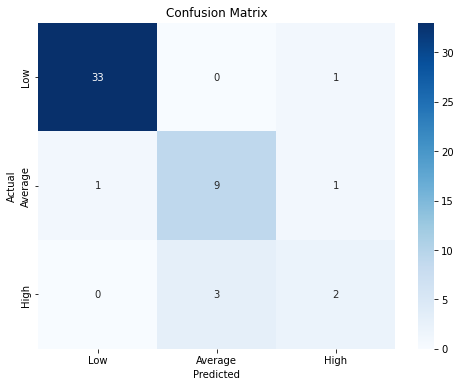

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Initialize the model
model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')

# 2. Train the model
model.fit(X_train, y_train)

# 3. Make predictions
y_pred = model.predict(X_test)

# 4. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 1. Get the confusion matrix
cm1 = confusion_matrix(y_test, y_pred)
plot_conf_matrix(cm1)

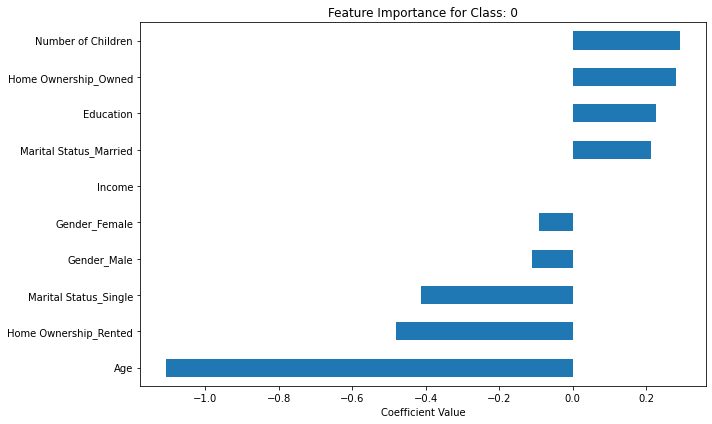

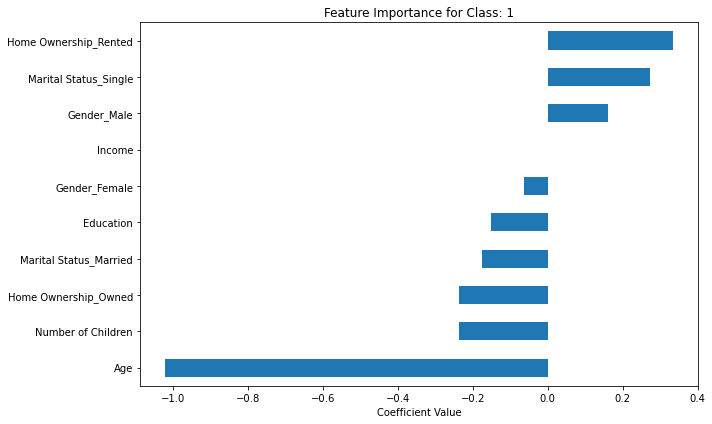

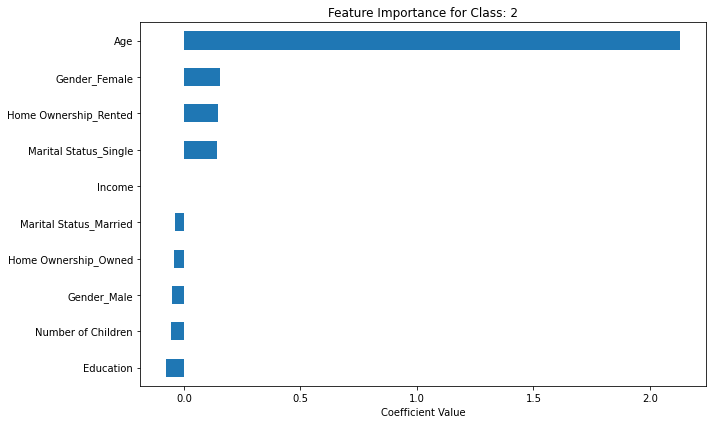

In [60]:
feature_names = X_train.columns
for i, class_label in enumerate(model.classes_):
    importance = pd.Series(model.coef_[i], index=feature_names)
    importance.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))
    plt.title(f"Feature Importance for Class: {class_label}")
    plt.xlabel("Coefficient Value")
    plt.tight_layout()
    plt.show()

Logistic Regression Feature Importance:
Number of Children        0.292202
Home Ownership_Owned      0.280563
Education                 0.228441
Marital Status_Married    0.212878
Income                    0.000797
Gender_Female            -0.090572
Gender_Male              -0.109817
Marital Status_Single    -0.413267
Home Ownership_Rented    -0.480952
Age                      -1.108037
dtype: float64


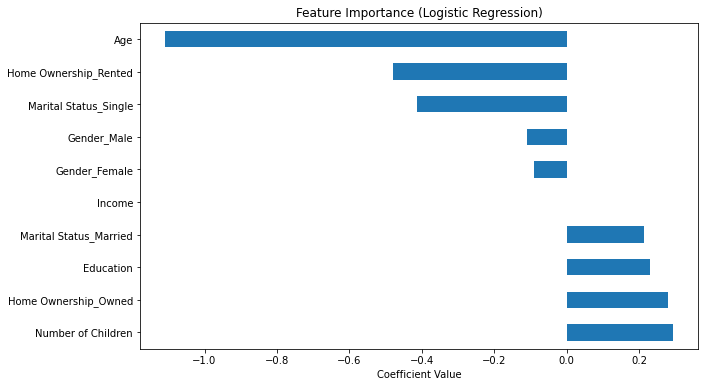

In [61]:
feature_names = X_train.columns
importance_logreg = pd.Series(model.coef_[0], index=feature_names)
importance_logreg = importance_logreg.sort_values(ascending=False)

print("Logistic Regression Feature Importance:")
print(importance_logreg)

# Optional: visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
importance_logreg.plot(kind='barh')
plt.title("Feature Importance (Logistic Regression)")
plt.xlabel("Coefficient Value")
plt.show()

# Decision Tree 1.0

Accuracy: 0.96

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.91      0.91      0.91        11
           2       0.83      1.00      0.91         5

    accuracy                           0.96        50
   macro avg       0.91      0.96      0.93        50
weighted avg       0.96      0.96      0.96        50



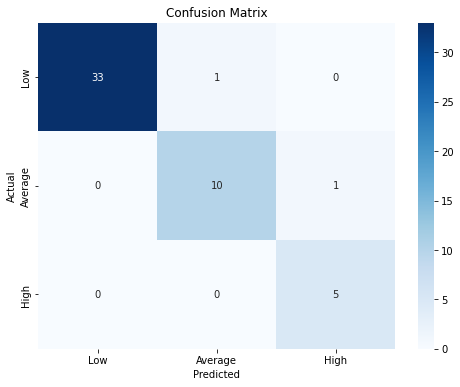

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# 2. Train the model
dt_model.fit(X_train, y_train)

# 3. Make predictions
y_pred_dt = dt_model.predict(X_test)

# 4. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# 1. Get the confusion matrix
cm2 = confusion_matrix(y_test, y_pred_dt)
plot_conf_matrix(cm2)

### Decision Tree Feature Importance:


Index(['Age', 'Income', 'Education', 'Number of Children',
       'Marital Status_Married', 'Marital Status_Single', 'Gender_Female',
       'Gender_Male', 'Home Ownership_Owned', 'Home Ownership_Rented'],
      dtype='object')


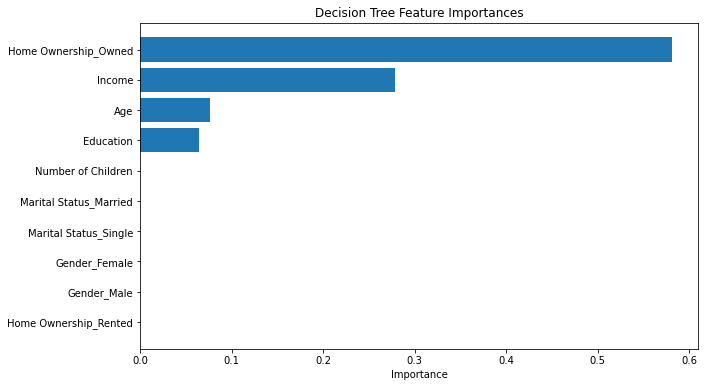

In [63]:
importances = dt_model.feature_importances_

# Get feature names
feature_names = X_train.columns
print(feature_names)
# Create a DataFrame for easy plotting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Decision Tree Feature Importances")
plt.show()

In [64]:
# Select important features
important_features = feat_imp_df[feat_imp_df['Importance'] > 0.1]['Feature'].tolist()

# Filter your train/test data
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

In [65]:
# Train again on reduced feature set
dt_model.fit(X_train_reduced, y_train)
y_pred1_2 = dt_model.predict(X_test_reduced)

Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      0.91      0.95        11
           2       0.83      1.00      0.91         5

    accuracy                           0.98        50
   macro avg       0.94      0.97      0.95        50
weighted avg       0.98      0.98      0.98        50



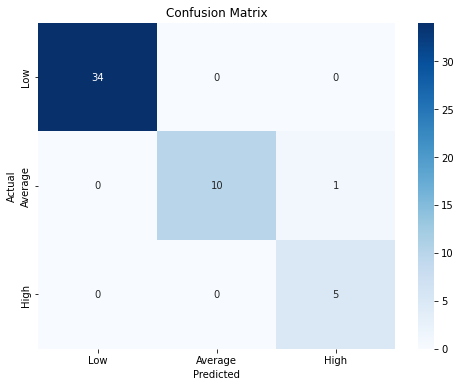

In [66]:
# 4. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred1_2))
print("\nClassification Report:\n", classification_report(y_test, y_pred1_2))

# 1. Get the confusion matrix
cm1_2 = confusion_matrix(y_test, y_pred1_2)
plot_conf_matrix(cm1_2)

# Decision Tree 2.0 -> adding weight to handle imbalanced

Accuracy: 0.96

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.91      0.91      0.91        11
           2       0.83      1.00      0.91         5

    accuracy                           0.96        50
   macro avg       0.91      0.96      0.93        50
weighted avg       0.96      0.96      0.96        50



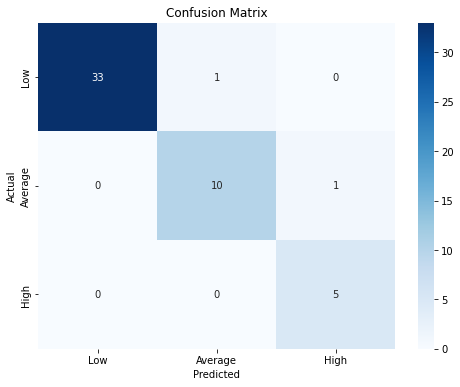

In [69]:
# 1. Initialize the model
dt_model_2 = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# 2. Train the model
dt_model_2.fit(X_train, y_train)

# 3. Make predictions
y_pred_dt_2 = dt_model.predict(X_test)

# 4. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_dt_2))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt_2))

# 1. Get the confusion matrix
cm2_2 = confusion_matrix(y_test, y_pred_dt_2)
plot_conf_matrix(cm2_2)

# Random Forest

Accuracy: 0.96

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        34
           1       0.91      0.91      0.91        11
           2       0.83      1.00      0.91         5

    accuracy                           0.96        50
   macro avg       0.91      0.96      0.93        50
weighted avg       0.96      0.96      0.96        50



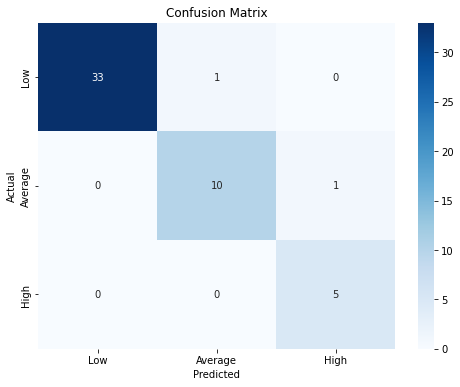

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Initialize the model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# 2. Train the model
rf_model.fit(X_train, y_train)

# 3. Make predictions
y_pred_rf = rf_model.predict(X_test)

# 4. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# 5. Get the confusion matrix
cm3 = confusion_matrix(y_test, y_pred_rf)
plot_conf_matrix(cm3)

# Random Forest with Class Weight to Handle the Imbalance Dataset

Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      0.91      0.95        11
           2       0.83      1.00      0.91         5

    accuracy                           0.98        50
   macro avg       0.94      0.97      0.95        50
weighted avg       0.98      0.98      0.98        50



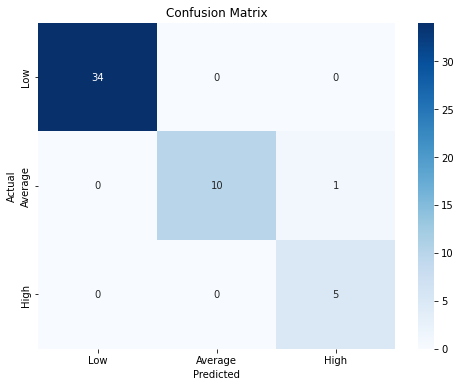

In [71]:
# 1. Initialize the model with class_weight='balanced'
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=100,
    class_weight='balanced'  # Automatically adjusts weights inversely proportional to class frequencies
)

# 2. Train the model
rf_model.fit(X_train, y_train)

# 3. Make predictions
y_pred_rf_weight = rf_model.predict(X_test)

# 4. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_rf_weight))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf_weight))

# 5. Confusion Matrix
cm4 = confusion_matrix(y_test, y_pred_rf_weight)
plot_conf_matrix(cm4)

# Random Forest with Reduced Features


In [72]:
# Train again on reduced feature set
dt_model.fit(X_train_reduced, y_train)
y_pred14_2 = dt_model.predict(X_test_reduced)

Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      0.91      0.95        11
           2       0.83      1.00      0.91         5

    accuracy                           0.98        50
   macro avg       0.94      0.97      0.95        50
weighted avg       0.98      0.98      0.98        50



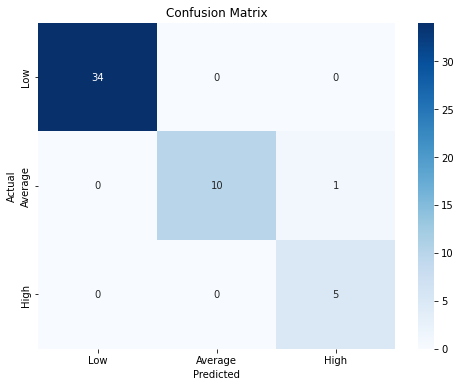

In [73]:
# 4. Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred14_2))
print("\nClassification Report:\n", classification_report(y_test, y_pred14_2))

# 5. Confusion Matrix
cm5 = confusion_matrix(y_test, y_pred14_2)
plot_conf_matrix(cm5)

🧪 Experiment Summary: 

* Credit Score Classification

* Logistic Regression (both basic and with class weights) performed the worst, with lower accuracy compared to tree-based models.

* Decision Tree and Random Forest classifiers showed strong performance, **achieving around 96% accuracy**.

* When **class weights** were applied to handle class imbalance in both Decision Tree and Random Forest models, **performance further improved, reaching up to 98% accuracy**.

* Feature selection (using only important features) did not improve model performance. **The reduced feature set resulted in a consistent 96% accuracy**, similar to the original full-feature models.

